In [2]:
%matplotlib notebook

import h5py
import matplotlib.pyplot as plt
from numpy import *
import pandas as pd
import os
import sys
import scipy.optimize as opt
from typing import Dict, Any
import recordclass.recordclass as rc
from itertools import product

if (os.name == 'posix'):
    repo_path = r"/Volumes/C/Public/Users/Hybrid/Repos/Hybrid_H5/H5_python3"
else:
    repo_path = r"C:\Users\Hybrid\Repos\Hybrid_H5\H5_python3"
sys.path.append(repo_path)
# local imports
import DataH5
import HamamatsuH5

In [4]:
h5file = h5py.File('results.hdf5',mode='r+')

#Find number of measurements per experiment
measurements = h5file['settings/experiment/measurementsPerIteration'][()]
num_its = len(h5file['iterations'])

#Find independent variable names and values
indep_vars = DataH5.get_indep_vars(h5file)
iVars = list(indep_vars.keys())

# map iterations to independent variable values
iterations = DataH5.make_iterations_df(h5file, iVars)

## Create n-darray of iteration numbers
* useful when there are multiple independent variables
* Indexing is [ivar1,ivar2,ivar3,...,ivarn]
* ivar ordering is alphabetical
* identical to ordering of keys in indep_vars

# Hamamatsu

In [5]:
# Set ROI
fg = HamamatsuH5.set_frame_grabber_region(h5file)
width = fg['right']-fg['left']
height = fg['bottom']-fg['top']

# For documentation try > help(HMROI)
roi = HamamatsuH5.HMROI(width,height,dic = {
    "left" : 2,
    "right" : 5,
    "top" : 4,
    "bottom" : 7
})

#Load data into memory
shots_per_measurement = int(h5file['/settings/experiment/LabView/camera/shotsPerMeasurement/function'][()])
# pixel-by-pixel data indexed : [iteration, measurement, shot, y-pixel, x-pixel]
hm_pix = HamamatsuH5.load_data(h5file,roi)

#take pixel-by-pixel data and treat it into counter data then mean data
# "count" data indexed : [iteration, measurement, shot]
hm_counts = hm_pix.sum(3).sum(3)
# mean count data indexed : [iteration, shot]
mus = hm_counts.mean(1)
# standard deviation in mean indexed : [iteration, shot]
ers = hm_counts.std(1)/sqrt(measurements)

## Plot Histograms of count data

In [ ]:
plots = True
if plots and len(iterations) > 22:
    ans = input(f"You're about to plot {len(iterations)} histograms. Are you sure you want to do that? (y/N) : ").upper()[0]
    plots = ans=="Y"
if plots:
    fig,axarr = plt.subplots(len(iterations),1,figsize=(6,4*len(iterations)))
    for iteration, row in iterations.iterrows():
        iteration = int(iteration)
        for shot in range(shots_per_measurement):
            axarr[iteration].hist(hm_counts[iteration,:,shot],histtype='step', label = f"shot {shot}",bins=30)
        axarr[iteration].legend()
        axarr[iteration].set_title(str(row))
        fig.tight_layout()
    fig.show()
else:
    print("You have chosen not to plot the histograms.")

## Plot mean count data
* If only 1 iteration : Prints out means for each shot and the corresponding standard deviation
* If there is 1 independent variable : Plot means for each iteration with error bars
* If there are 2 independent variables : show image of means for each iteration.

<IPython.core.display.Javascript object>


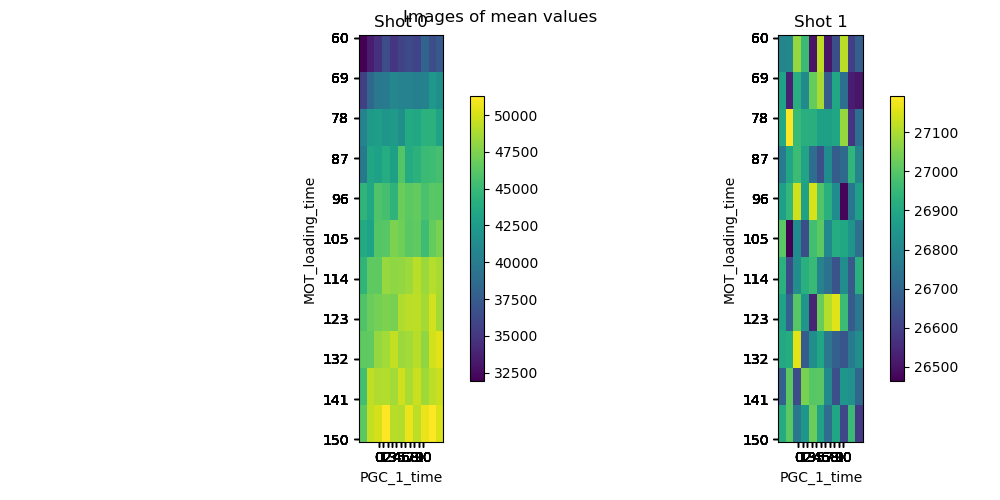

In [6]:
import PlottingH5
PlottingH5.default_plotting(iterations,mus,ers,shots_per_measurement)

## Show images taken within ROI

In [9]:
mus_nd = DataH5.fold_to_nd(iterations,mus[:,0])

['iteration', 'MOT_loading_time', 'PGC_1_time']


<IPython.core.display.Javascript object>


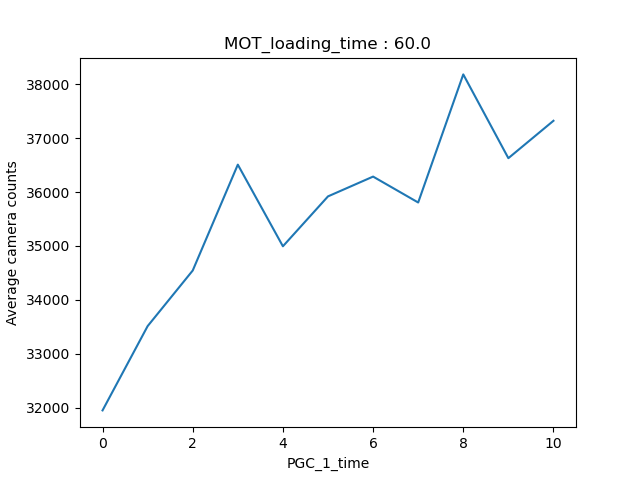

<IPython.core.display.Javascript object>


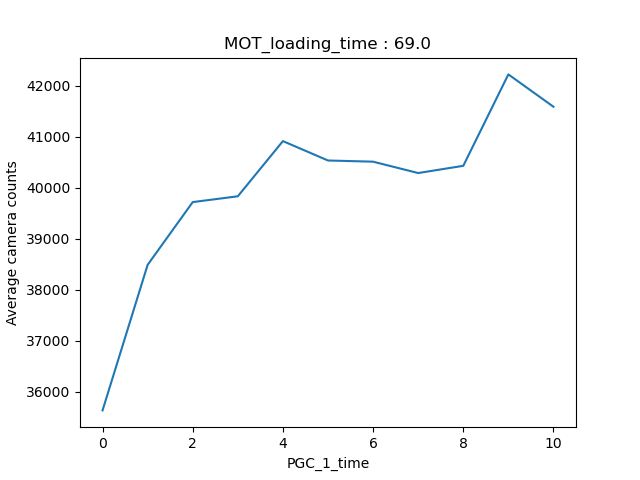

<IPython.core.display.Javascript object>


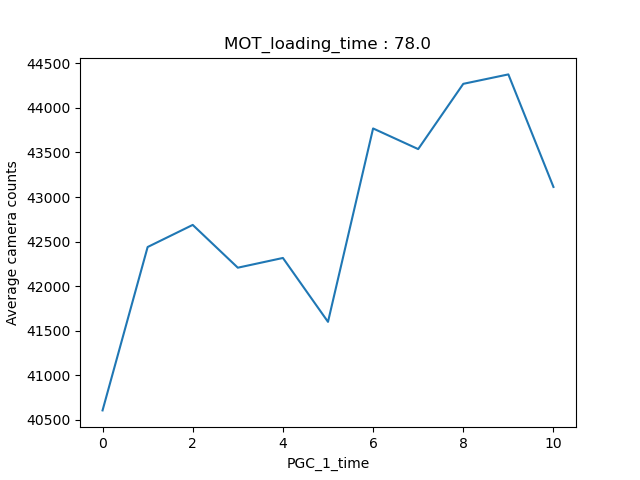

<IPython.core.display.Javascript object>


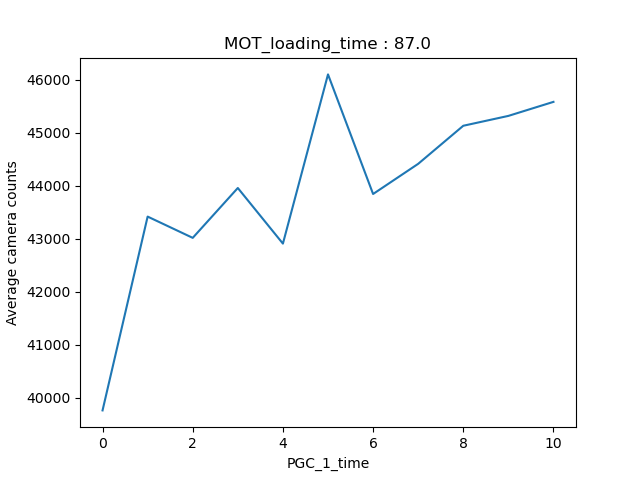

<IPython.core.display.Javascript object>


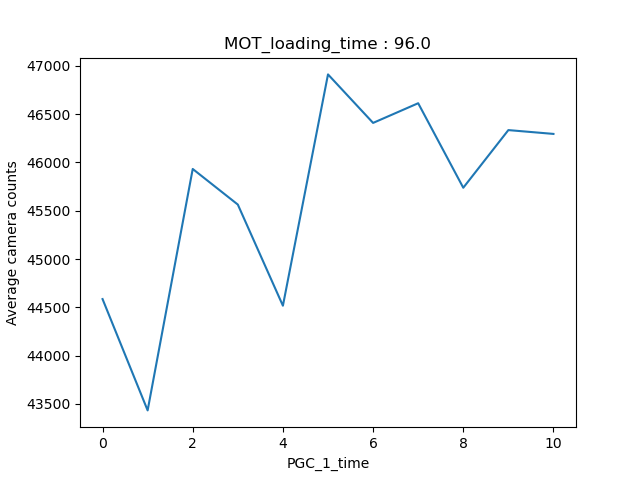

<IPython.core.display.Javascript object>


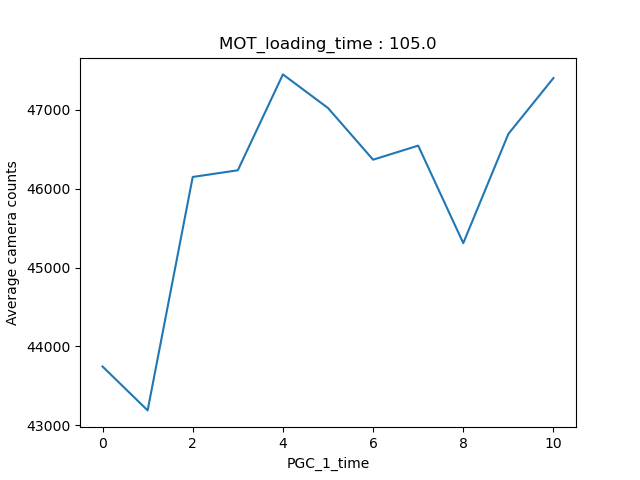

<IPython.core.display.Javascript object>


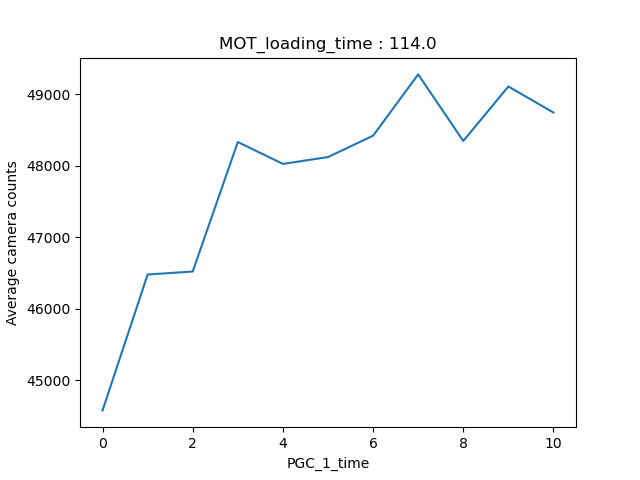

<IPython.core.display.Javascript object>


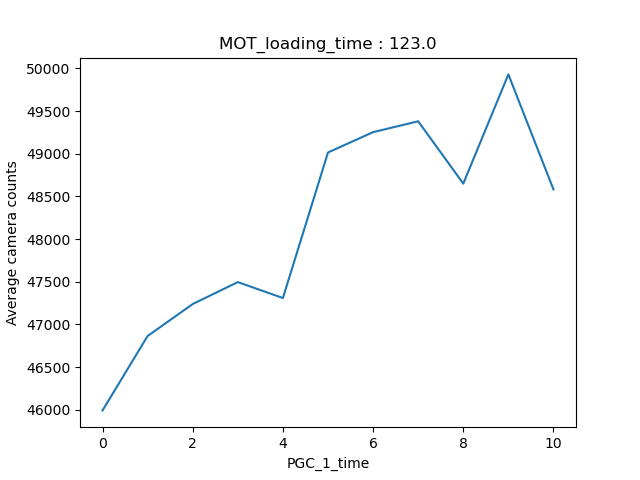

<IPython.core.display.Javascript object>


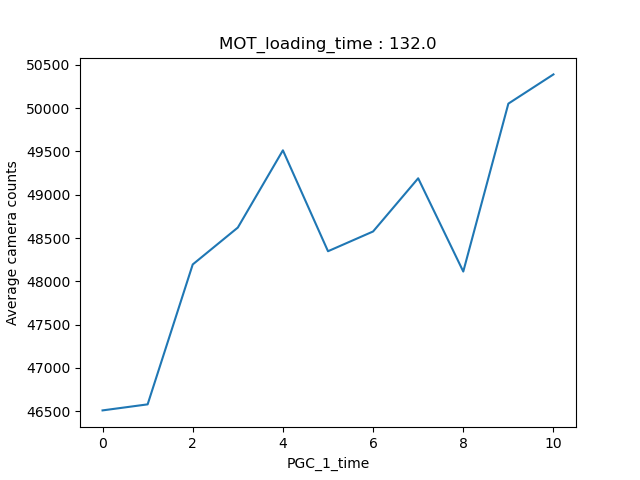

<IPython.core.display.Javascript object>


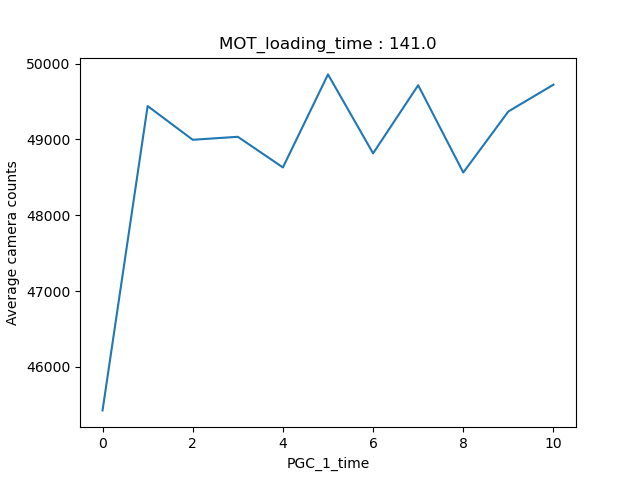

<IPython.core.display.Javascript object>


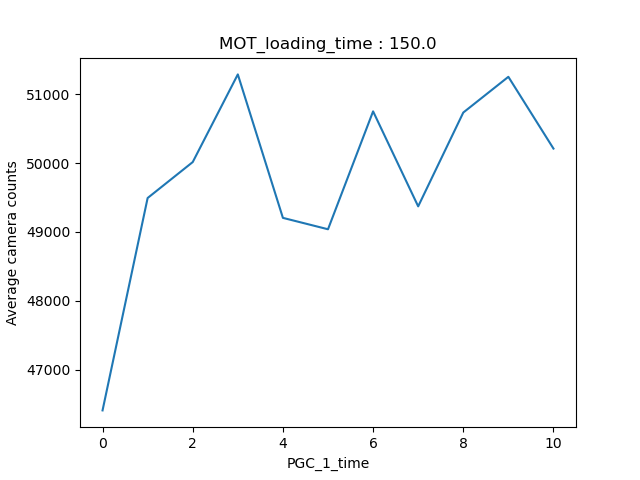

In [18]:
print(list(iterations.keys()))
for it, ivar1 in enumerate(mus_nd):
    iv_it = list(iterations.keys())[1]
    iv_ax = list(iterations.keys())[2]
    fig,ax = plt.subplots(1,1)
    ax.plot(list(set(iterations[iv_ax])),ivar1)
    ax.set_xlabel(iv_ax)
    ax.set_title(f"{iv_it} : {sorted(list(set(iterations[iv_it])))[it]}")
    ax.set_ylabel("Average camera counts")
    fig.show()

In [16]:
set([1,2,3])

{1, 2, 3}

In [ ]:
## show average image for one shot for each iteration
im_shot = 0 # shot to image

fig,axarr = plt.subplots(len(iterations),1,figsize=(6,4*len(iterations)))
for iteration, row in iterations.iterrows():
    i = row['iteration']
    ivs = {iVar: row[iVar] for iVar in iVars}
    axarr[i].imshow(hm_pix[i,:,im_shot,:,:].mean(0))
    axarr[i].set_title(str(row))
fig.tight_layout()
fig.show()

## Plot Histgram data of each picture for each iteration
* Very memory hungry!
* Please clear output before saving, copying or pushing if this cell was run

In [ ]:
im_width = roi.right-roi.left
im_height = roi.bottom-roi.top
for iteration, row in iterations.iterrows():
    i = row['iteration']
    fig,axarr = plt.subplots(im_height,im_width,figsize = (10,10))
    for y in range(im_height):
        for x in range(im_width):
            bns = 20
            for shot in range(shots_per_measurement):
                axarr[y,x].hist(hm_pix[i,:,shot,y,x],bins=bns,histtype='step',label = f"Shot {shot}")
            axarr[y,x].set_title(f"x = {x}, y = {y}")
            axarr[y,x].legend()
    fig.suptitle(str(row))
    fig.tight_layout()
    fig.show()

* Ensure once things get better they can get involved in Madison
* Not isolated
* on slack (check)
* check on classes/TAing